## Rotation matrix

Multiplying a vector by a matrix is equivalent to apply a linear transformation to that vector. One common example, is the rotation matrix: ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/678b1828be1c7064bc3f25cd1cb323f88f0d8acf)

where the theta is the angle by which the vector is rotated.

Could you create a function that:
    
- receive the angle as input argument and a vector as input
- plots both the original and the transformed vector on the same plot but with different colors

?

BONUS: https://matplotlib.org/stable/api/animation_api.html

Can you make an animation that shows the intermediate steps of the rotation and save into a gif?

Tip: don't contraint your imagination.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def rotation_matrix(angle, vector):
    r_theta = np.array([[math.cos(math.radians(angle)), -math.sin(math.radians(angle))], [math.sin(math.radians(angle)),
                        math.cos(math.radians(angle))]])
    vector = np.array(vector)
    return np.matmul(np.round(r_theta, 1), vector) 
    

angle = 90
my_vector = np.array([2,1])    
new_vector = rotation_matrix(angle, my_vector)

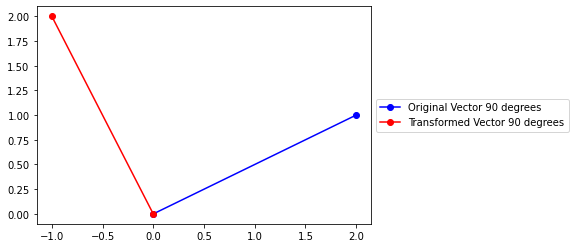

In [2]:
fig = plt.figure()
ax = fig.gca(projection='rectilinear')
ax.plot(np.linspace(0, my_vector[0], 2),np.linspace(0, my_vector[1], 2), marker="o", color="b", label="Original Vector "+str(angle)+" degrees")
ax.plot(np.linspace(0, new_vector[0], 2),np.linspace(0, new_vector[1], 2), marker="o", color="r", label="Transformed Vector "+str(angle)+" degrees")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/chriswmann/datasets/master/500_Person_Gender_Height_Weight_Index.csv")

In [4]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


You have collected some data about 500 samples of people.

You have information about the weight, the height, the gender and the BMI of the person.

For the BMI:

- 0 means 'Extremely Weak'
- 1 means 'Weak'
- 2 means 'Normal'
- 3 means 'Overweight'
- 4 means 'Obesity'
- 5 means 'Extreme Obesity'

Before starting: *what does each row represent?*
    


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


<AxesSubplot:>

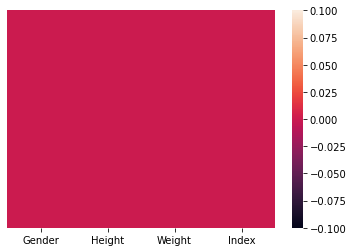

In [6]:
sns.heatmap(df.isnull(), yticklabels=False)
# plt.savefig('heatmap.png')

In [7]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


- Can you make an overview about them? For example: how many women are overweight? How many men? Etc etc. 

- Can you plot the data such that on the x axis you have the weight, on the y axis you have the height, and the individuals of the same BMI (column index) get colored with the same color?

<AxesSubplot:xlabel='Index', ylabel='count'>

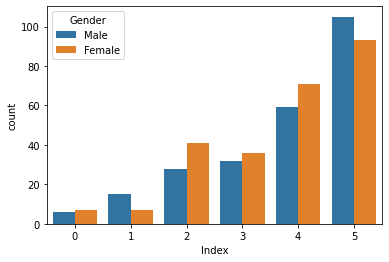

In [9]:
import seaborn as sns
sns.countplot(x="Index", hue="Gender", data=df)

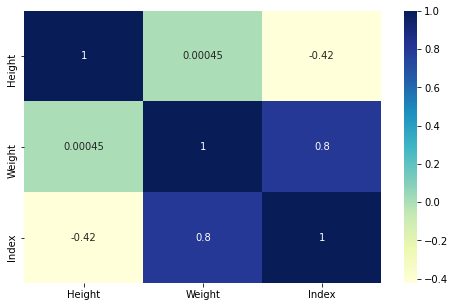

In [10]:
# Checking the correlation of each features in the given dataset
correlation = df.corr()
corr_features = correlation.index
plt.figure(figsize=(8,5))
fig = sns.heatmap(df[corr_features].corr(), annot=True, cmap="YlGnBu")

Text(0.5, 0, 'Weight of the people (kg)')

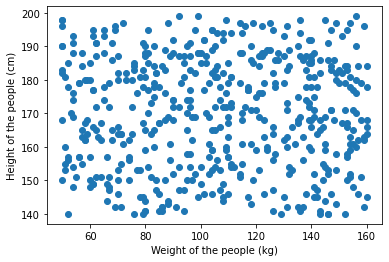

In [11]:
# Set up the scatter plot
plt.figure(figsize=(6,4))
# sns.scatterplot(data=df, x="Weight", y="Height", hue="Index")
plt.scatter(x='Weight', y='Height', data=df, cmap="jet")
# Add in labels for the axes
plt.ylabel('Height of the people (cm)', fontsize=10)
plt.xlabel('Weight of the people (kg)', fontsize=10)
#plt.colorbar(label='Gamma Ray - API')


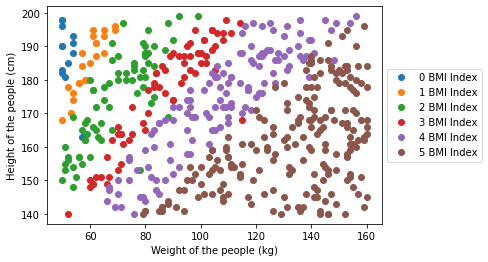

In [12]:
groups = df.groupby("Index")
for name, group in groups:
    plt.plot(group["Weight"], group["Height"], marker="o", linestyle="", label=str(name)+" BMI Index")
    plt.ylabel('Height of the people (cm)', fontsize=10)
    plt.xlabel('Weight of the people (kg)', fontsize=10)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Do the same but only for males:
    

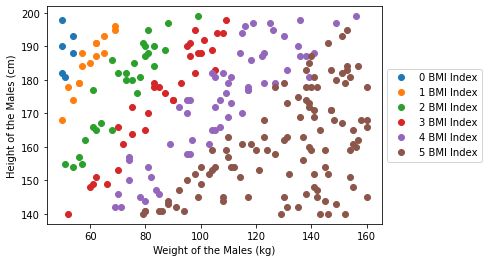

In [13]:
# For Males
male_df = df.loc[df['Gender'] == "Male"]

male_groups = male_df.groupby("Index")
for name, group in male_groups:
    plt.plot(group["Weight"], group["Height"], marker="o", linestyle="", label=str(name)+" BMI Index")
    plt.ylabel('Height of the Males (cm)', fontsize=10)
    plt.xlabel('Weight of the Males (kg)', fontsize=10)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Repeat for females:

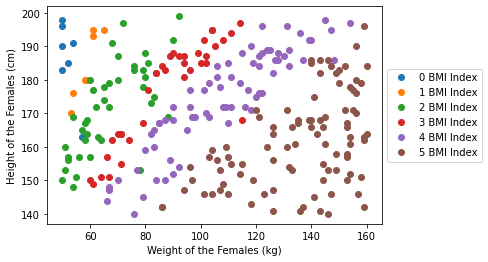

In [14]:
# For Females
female_df = df.loc[df['Gender'] == "Female"]

female_groups = female_df.groupby("Index")
for name, group in female_groups:
    plt.plot(group["Weight"], group["Height"], marker="o", linestyle="", label=str(name)+" BMI Index")
    plt.ylabel('Height of the Females (cm)', fontsize=10)
    plt.xlabel('Weight of the Females (kg)', fontsize=10)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Can you plot the histograms of the height of males, females and the total dataset? 

Do the same for the weight.

[16. 13.  9.  9. 15.  7. 12. 14. 12. 10. 10. 11. 15. 19. 16. 12. 16. 10.
 10.  9.]


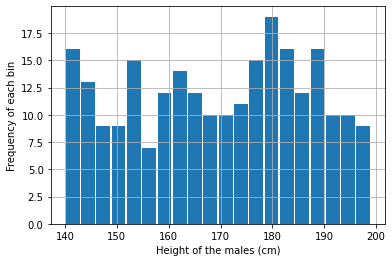

In [15]:
# Males height
male_height = male_df["Height"]
counts, edges, plot = plt.hist(male_height, bins=20, rwidth=0.9)
print(counts)
plt.ylabel('Frequency of each bin', fontsize=10)
plt.xlabel('Height of the males (cm)', fontsize=10)
plt.grid()


[12.  9. 12. 10. 11. 15. 14.  7. 17. 11. 19.  9. 10.  8. 13.  8. 24. 10.
 14. 12.]


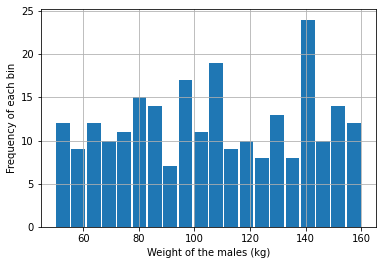

In [16]:
# Males Weight
male_weight = male_df["Weight"]
counts, edges, plot = plt.hist(male_weight, bins=20, rwidth=0.9)
plt.ylabel('Frequency of each bin', fontsize=10)
plt.xlabel('Weight of the males (kg)', fontsize=10)
print(counts)
plt.grid()

[ 9.  4. 12. 15. 13. 15.  9. 12. 16. 22. 16.  5. 14. 14. 19. 22. 13.  8.
 11.  6.]


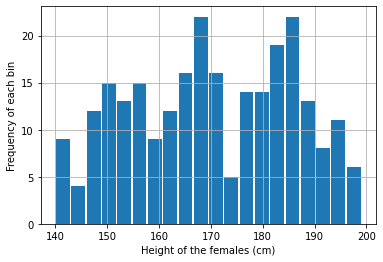

In [17]:
# Female Heights
female_height = female_df["Height"]
female_weight = female_df["Weight"]
counts, edges, plot = plt.hist(female_height, bins=20, rwidth=0.9)
plt.ylabel('Frequency of each bin', fontsize=10)
plt.xlabel('Height of the females (cm)', fontsize=10)
plt.grid()
print(counts)

[16. 12. 13. 14.  6. 12. 15. 10. 13. 14. 16. 10. 13. 13. 10.  9. 14. 13.
 17. 15.]


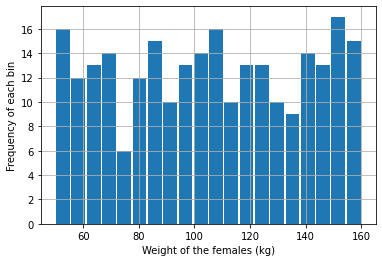

In [18]:
# Female Weights
female_weight = female_df["Weight"]
counts, edges, plot = plt.hist(female_weight, bins=20, rwidth=0.9)
plt.ylabel('Frequency of each bin', fontsize=10)
plt.xlabel('Weight of the females (kg)', fontsize=10)
plt.grid()
print(counts)

## Euclidean Distance

In the above data, the mean of all the points is given by the sum of all the points divided by the number of them. Pandas, does it for us by doing:

In [19]:
mean_vector = [df.Weight.mean(), df.Height.mean()]
mean_vector

[106.0, 169.944]

- I know that is less efficient, but I want to see if you understand the concept of the mean of vectors: can you redo the process with a for loop?

- Plot the data again together with the mean value that must be visible in the middle, maybe with another size or marker and color

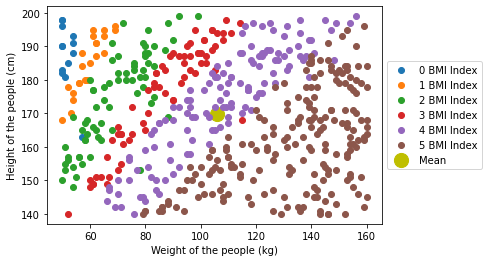

In [20]:
def calculate_mean(weight, height):
    total_weight=0
    total_height=0
    for w, h in zip(weight, height):
        total_weight+=w
        total_height+=h
    average_weight = total_weight / len(weight)
    average_height = total_height / len(height)
    return [average_weight, average_height]

average_mean = calculate_mean(df["Weight"],df["Height"])

groups = df.groupby("Index")
for name, group in groups:
    plt.plot(group["Weight"], group["Height"], marker="o", linestyle="", label=str(name)+" BMI Index")
    plt.ylabel('Height of the people (cm)', fontsize=10)
    plt.xlabel('Weight of the people (kg)', fontsize=10)
plt.scatter(average_mean[0], average_mean[1], marker='o', s=200, c="y", label="Mean")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

It's not surprising that is perfectly in the middle, is it?

Now, compute the mean of the elements that have a specific BMI: for example, the mean of all the elements with index 1, then the mean of the elements of index 2... 

Plot the mean of the all points as above together with the means of the different groups, all with different colors. Don't plot the rest of the points, they would lead to confusion.

Don't forget to add the legend!

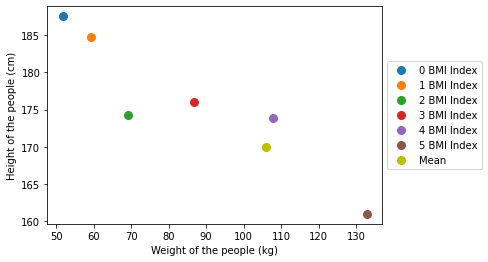

In [21]:
groups = df.groupby("Index")
for name, group in groups:
    #print(name, group["Weight"].mean(), group["Height"].mean())
    plt.plot(group["Weight"].mean(), group["Height"].mean(), marker="o",markersize=8, linestyle="", label=str(name)+" BMI Index")
    plt.ylabel('Height of the people (cm)', fontsize=10)
    plt.xlabel('Weight of the people (kg)', fontsize=10)
plt.scatter(average_mean[0], average_mean[1], marker='o', s=65, c="y", label="Mean")    
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

The differences look more evident now, right?

For each of the points on the plot, except for the "Mean" point, can you compute the euclidean distance from the mean vector? (Hey, I'm using point, vector, samples to refer to the same thing! This is because data points have multiple names, like Spanish people https://www.youtube.com/watch?v=z7qYTNp17ao ).

Remember, if you have two points $v = (v1, v2)$ and $w = (w1, w2)$, the euclidean distance is given by the formula:

$$||v-w|| = \sqrt{(v1-w1)^{2} + (v2-w2)^{2})}$$

or it looks like the norm of a difference in numpy... or the `euclidean` method of scipy... Up to you, as long as you get the result to your awesome boss.

# PCA

Install the `scikit-learn` library by running `conda install -c conda-forge scikit-learn` on your terminal or installing `scikit-learn` from your Anaconda Navigator.

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

This library contains a dataset with hand written digits. Let's see some samples:

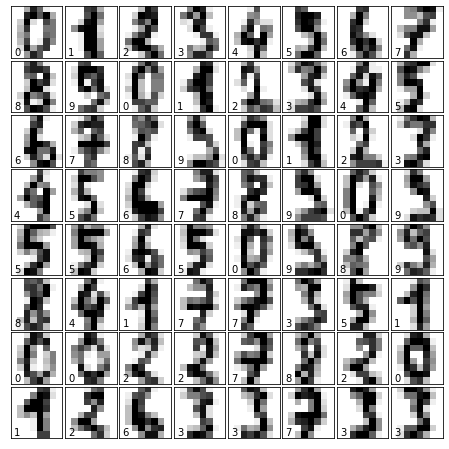

In [23]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Don't worry about the code above, I just copy pasted it from the documentation. 

The images have a lot of dimensions (each pixel can be thought as a coordinate):

In [24]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [25]:
digits.images[0].shape

(8, 8)

precisely 8x8 dimensions (so 64 coordinates!). How can we plot a system of 64 coordinates? Well, it's pretty hard to do on a piece of a paper, even with a 3D representation. I can imagine some ways to represent 5D data, with a lot of creativity, but still...

So there's this technique, called PCA, that "project" the data into two main axes, so that you can look at them from a distance, so that they look as 2D points:

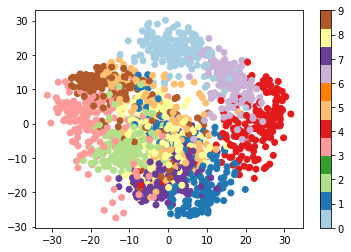

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

here we go! It's still a little mess, isn't it? However, look at how the points related to 0 are close to the points related to 6! and the 1s to the 7s! Make sense, right? They look very similar when you draw them!

I want you to redo the same thing you did for BMI: let's put the projections in a dataframe:

In [27]:
digits_df = pd.DataFrame({"x":proj[:, 0], "y":proj[:, 1], "label":digits.target})

In [28]:
digits_df

,x,y,label
0,-1.259457,21.274848,0
1,7.957628,-20.768765,1
2,6.991908,-9.955930,2
3,-15.906098,3.332439,3
4,23.306867,4.269058,4
...,...,...,...
1792,-14.606634,13.344143,9
1793,6.464553,20.567376,0
1794,10.801269,-6.960196,8
1795,-4.872092,12.423916,9


Don't worry if I use `digits.target` for example, it's just something provided by the sklearn library and I'm taking advantage of it. In real life, it's not that easy for each dataset! However, what looks like magic now, will be easier in the ML module!

- Question: what does the column "label" represent?

### Exercise

- Group the dataframe by the labels, and compute the means w.r.t. the means and plot only them.
- Don't forget the legend!
- Hint: set `plt.xlim([-40,40]` so that the legend doesn't overlap


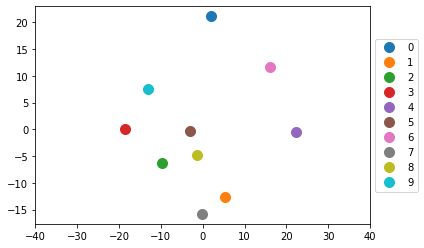

In [29]:
groups = digits_df.groupby("label")
for name, group in groups:
    #print(name, group["Weight"].mean(), group["Height"].mean())
    plt.plot(group["x"].mean(), group["y"].mean(), marker="o",markersize=10, linestyle="", label=name) 
    plt.xlim([-40,40])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

## Finally: surprise me! What can you bring more than the other team? 
